In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
# Loading the Boston Housing dataset from Keras
from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [31]:
# Displaying the shape of the datasets
print("Size of Training Data:", X_train.shape, y_train.shape)
print("Size of Testing Data:", X_test.shape, y_test.shape)

Size of Training Data: (404, 13) (404,)
Size of Testing Data: (102, 13) (102,)


In [32]:
# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Building the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Early stopping to reduce overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [37]:
#Training the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop])

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 569.0654 - mean_absolute_error: 21.9384 - val_loss: 604.4103 - val_mean_absolute_error: 22.7438
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 537.0914 - mean_absolute_error: 20.9820 - val_loss: 569.2630 - val_mean_absolute_error: 21.9291
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 502.3481 - mean_absolute_error: 20.3255 - val_loss: 528.6681 - val_mean_absolute_error: 20.9446
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 458.2127 - mean_absolute_error: 18.9107 - val_loss: 478.5653 - val_mean_absolute_error: 19.7336
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 453.7407 - mean_absolute_error: 18.6875 - val_loss: 417.8661 - val_mean_absolute_error: 18.1863
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 365.4325 - mean_absolute_error: 16.5684 - val_loss: 350.1961 - val_mean_absolute_error: 16.3288
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 306.

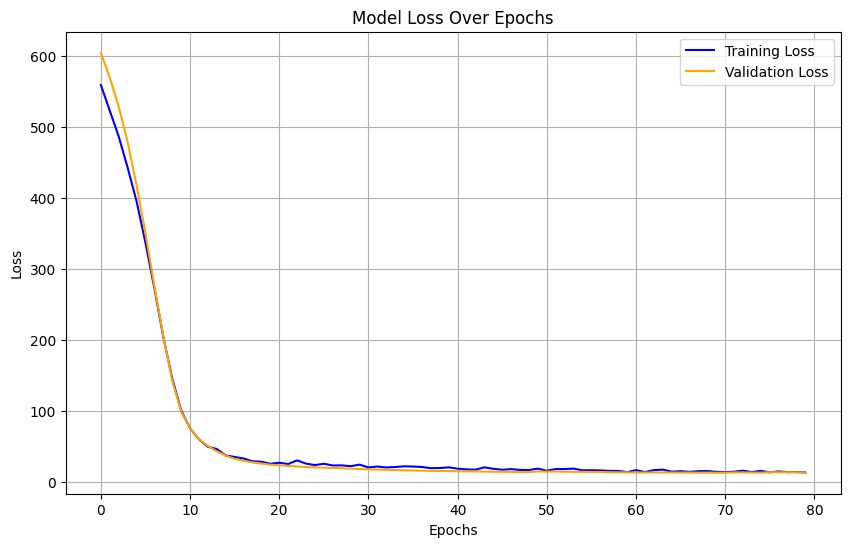

In [38]:
# Plotting training vs validation loss
plt.figure(figsize=(10, 6))
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# Evaluating the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error on Test Data:", mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.7853 - mean_absolute_error: 3.1151
Mean Absolute Error on Test Data: 3.335397243499756
